In [1]:
!pip install -qq git+https://www.github.com/ildoonet/tf-pose-estimation

pathos 0.2.3 has requirement dill>=0.2.9, but you'll have dill 0.2.7.1 which is incompatible.
multiprocess 0.70.7 has requirement dill>=0.2.9, but you'll have dill 0.2.7.1 which is incompatible.


In [2]:
!pip install -qq pycocotools

In [3]:
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 125
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

In [4]:
%matplotlib inline
import tf_pose
import cv2
from glob import glob
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
import os
def video_gen(in_path):
    c_cap = cv2.VideoCapture(in_path)
    rate=c_cap.get(5)
    print(rate)
    while c_cap.isOpened():
        ret, frame = c_cap.read()
        if not ret:
            break
        frame=cv2.rotate(frame, cv2.cv2.ROTATE_90_CLOCKWISE)
        yield c_cap.get(cv2.CAP_PROP_POS_MSEC), frame[:, :, ::-1]
    c_cap.release()

In [6]:
video_paths = glob('../input/multi-person-test-video/WhatsApp Video 2020-11-28 at 12.21.57 (1).mp4')
c_video = video_gen(video_paths[0])
print(c_video)
for _ in range(300):
    
    c_ts, c_frame = next(c_video)
    #c_frame=cv2.rotate(c_frame, cv2.cv2.ROTATE_90_CLOCKWISE)
plt.imshow(c_frame)

<generator object video_gen at 0x7f38dd61bdb0>
29.59663375660506


StopIteration: 

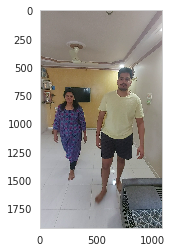

In [7]:
plt.imshow(c_frame)

In [8]:
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
tfpe = tf_pose.get_estimator()

[2020-11-28 07:44:17,040] [TfPoseEstimator] [INFO] loading graph from /opt/conda/lib/python3.6/site-packages/tf_pose_data/graph/cmu/graph_opt.pb(default size=432x368)
2020-11-28 07:44:17,040 INFO loading graph from /opt/conda/lib/python3.6/site-packages/tf_pose_data/graph/cmu/graph_opt.pb(default size=432x368)


TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

2020-11-28 07:44:19,047 WARNING From /opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [19]:
humans = tfpe.inference(npimg=c_frame, upsample_size=4.0)
for h in humans:
    print(h)

BodyPart:0-(0.66, 0.34) score=0.13 BodyPart:1-(0.66, 0.40) score=0.70 BodyPart:2-(0.56, 0.40) score=0.65 BodyPart:3-(0.49, 0.48) score=0.73 BodyPart:4-(0.47, 0.57) score=0.85 BodyPart:5-(0.77, 0.41) score=0.62 BodyPart:6-(0.81, 0.51) score=0.74 BodyPart:7-(0.83, 0.62) score=0.83 BodyPart:8-(0.55, 0.57) score=0.55 BodyPart:9-(0.53, 0.71) score=0.75 BodyPart:10-(0.51, 0.83) score=0.66 BodyPart:11-(0.67, 0.59) score=0.58 BodyPart:12-(0.64, 0.79) score=0.65 BodyPart:14-(0.65, 0.32) score=0.18 BodyPart:15-(0.68, 0.32) score=0.15 BodyPart:16-(0.63, 0.33) score=0.20 BodyPart:17-(0.71, 0.33) score=0.21
BodyPart:1-(0.25, 0.45) score=0.39 BodyPart:2-(0.18, 0.45) score=0.36 BodyPart:3-(0.13, 0.51) score=0.13 BodyPart:4-(0.12, 0.55) score=0.20 BodyPart:5-(0.31, 0.45) score=0.55 BodyPart:6-(0.35, 0.50) score=0.62 BodyPart:7-(0.37, 0.57) score=0.72 BodyPart:8-(0.21, 0.60) score=0.23 BodyPart:9-(0.21, 0.61) score=0.13 BodyPart:10-(0.24, 0.67) score=0.20 BodyPart:11-(0.30, 0.59) score=0.36 BodyPart:12

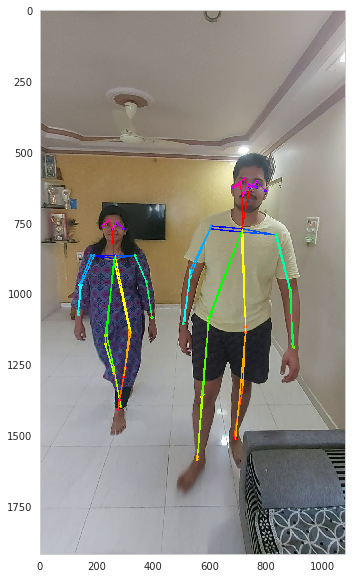

In [20]:
new_image = TfPoseEstimator.draw_humans(c_frame[:, :, ::-1], humans, imgcopy=False)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
ax1.imshow(new_image[:, :, ::-1])

In [24]:
body_to_dict = lambda c_fig: {'bp_{}_{}'.format(k, vec_name): vec_val 
                              for k, part_vec in c_fig.body_parts.items() 
                              for vec_name, vec_val in zip(['x', 'y'],
                                                           (part_vec.x, 1-part_vec.y, part_vec.score))}
c_fig = humans[0]
c_fig1=humans[1]
print(c_fig)
print(c_fig1)

BodyPart:0-(0.66, 0.34) score=0.13 BodyPart:1-(0.66, 0.40) score=0.70 BodyPart:2-(0.56, 0.40) score=0.65 BodyPart:3-(0.49, 0.48) score=0.73 BodyPart:4-(0.47, 0.57) score=0.85 BodyPart:5-(0.77, 0.41) score=0.62 BodyPart:6-(0.81, 0.51) score=0.74 BodyPart:7-(0.83, 0.62) score=0.83 BodyPart:8-(0.55, 0.57) score=0.55 BodyPart:9-(0.53, 0.71) score=0.75 BodyPart:10-(0.51, 0.83) score=0.66 BodyPart:11-(0.67, 0.59) score=0.58 BodyPart:12-(0.64, 0.79) score=0.65 BodyPart:14-(0.65, 0.32) score=0.18 BodyPart:15-(0.68, 0.32) score=0.15 BodyPart:16-(0.63, 0.33) score=0.20 BodyPart:17-(0.71, 0.33) score=0.21
BodyPart:1-(0.25, 0.45) score=0.39 BodyPart:2-(0.18, 0.45) score=0.36 BodyPart:3-(0.13, 0.51) score=0.13 BodyPart:4-(0.12, 0.55) score=0.20 BodyPart:5-(0.31, 0.45) score=0.55 BodyPart:6-(0.35, 0.50) score=0.62 BodyPart:7-(0.37, 0.57) score=0.72 BodyPart:8-(0.21, 0.60) score=0.23 BodyPart:9-(0.21, 0.61) score=0.13 BodyPart:10-(0.24, 0.67) score=0.20 BodyPart:11-(0.30, 0.59) score=0.36 BodyPart:12

In [ ]:
path='./'

In [12]:
MAX_FRAMES = 200
body_pose_list = []
for vid_path in tqdm_notebook(video_paths, desc='Files'):
    c_video = video_gen(vid_path)
    c_ts, c_frame = next(c_video)
    out_path = 'test_video_1.avi'
    out = cv2.VideoWriter(out_path,
                          cv2.VideoWriter_fourcc('M','J','P','G'),
                          10, 
                          (c_frame.shape[1], c_frame.shape[0]))
    for (c_ts, c_frame), _ in zip(c_video, 
                                  tqdm_notebook(range(MAX_FRAMES), desc='Frames')):
        bgr_frame = c_frame[:,:,::-1]
        humans = tfpe.inference(npimg=bgr_frame, upsample_size=4.0)
        for c_body in humans:
            body_pose_list += [dict(video=out_path, time=c_ts, **body_to_dict(c_body))]
        new_image = TfPoseEstimator.draw_humans(bgr_frame, humans, imgcopy=False)
        out.write(new_image)
    out.release()


29.59663375660506


In [13]:
import pandas as pd
# body_pose_df = pd.DataFrame(body_pose_list)
body_pose_df.tail()

,bp_0_x,bp_0_y,bp_10_x,bp_10_y,bp_11_x,bp_11_y,bp_12_x,bp_12_y,bp_13_x,bp_13_y,bp_14_x,bp_14_y,bp_15_x,bp_15_y,bp_16_x,bp_16_y,bp_17_x,bp_17_y,bp_1_x,bp_1_y,bp_2_x,bp_2_y,bp_3_x,bp_3_y,bp_4_x,bp_4_y,bp_5_x,bp_5_y,bp_6_x,bp_6_y,bp_7_x,bp_7_y,bp_8_x,bp_8_y,bp_9_x,bp_9_y,time,video
0,0.564815,0.646739,0.532407,0.445652,0.578704,0.543478,0.574074,0.505435,0.564815,0.461957,0.555556,0.657609,0.569444,0.652174,0.546296,0.646739,0.578704,0.646739,0.560185,0.619565,0.523148,0.619565,0.50000,0.581522,0.495370,0.543478,0.597222,0.619565,0.620370,0.586957,0.625000,0.543478,0.537037,0.548913,0.532407,0.505435,67.575253,test_video_1.avi
1,0.421296,0.619565,0.393519,0.451087,0.435185,0.527174,0.435185,0.505435,0.435185,0.456522,0.416667,0.625000,0.425926,0.625000,0.407407,0.614130,0.435185,0.619565,0.421296,0.586957,0.393519,0.592391,0.37037,0.565217,0.365741,0.543478,0.449074,0.592391,0.472222,0.559783,0.472222,0.538043,0.398148,0.527174,0.393519,0.494565,67.575253,test_video_1.avi
2,0.560185,0.652174,0.532407,0.445652,0.578704,0.543478,0.574074,0.505435,0.564815,0.461957,0.555556,0.657609,0.564815,0.657609,0.541667,0.646739,0.574074,0.646739,0.560185,0.619565,0.523148,0.614130,0.50000,0.581522,0.490741,0.543478,0.597222,0.619565,0.620370,0.586957,0.620370,0.543478,0.537037,0.548913,0.527778,0.505435,101.362879,test_video_1.avi
3,0.421296,0.619565,0.393519,0.445652,0.435185,0.527174,0.435185,0.505435,0.430556,0.456522,0.416667,0.625000,0.425926,0.625000,0.407407,0.614130,0.435185,0.619565,0.421296,0.586957,0.393519,0.592391,0.37037,0.565217,0.365741,0.543478,0.449074,0.592391,0.472222,0.565217,0.472222,0.538043,0.398148,0.527174,0.393519,0.494565,101.362879,test_video_1.avi
4,0.555556,0.652174,0.532407,0.445652,0.578704,0.543478,0.574074,0.505435,0.564815,0.461957,0.550926,0.657609,0.564815,0.657609,0.541667,0.646739,0.574074,0.646739,0.555556,0.614130,0.523148,0.614130,0.49537,0.581522,0.490741,0.543478,0.592593,0.614130,0.620370,0.586957,0.620370,0.543478,0.532407,0.548913,0.527778,0.505435,135.150505,test_video_1.avi


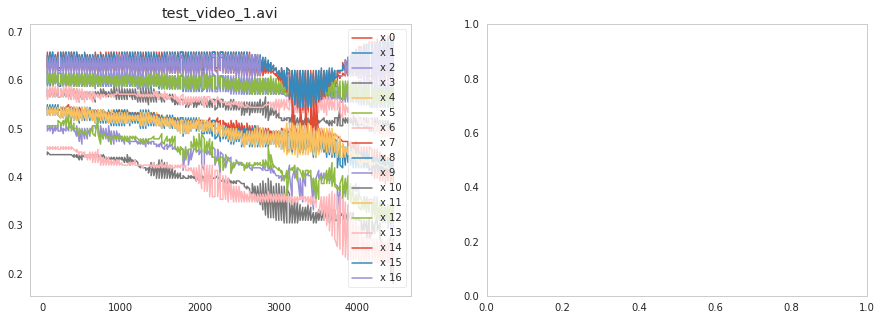

In [14]:
fig, m_axs = plt.subplots(1, 2, figsize=(15, 5))
for c_ax, (c_name, c_rows) in zip(m_axs, body_pose_df.groupby('video')):
    for i in range(17):
        c_ax.plot(c_rows['time'], c_rows['bp_{}_y'.format(i)], label='x {}'.format(i))
    c_ax.legend()
    c_ax.set_title(c_name)

UndefinedVariableError: name 'bp_0_score' is not defined

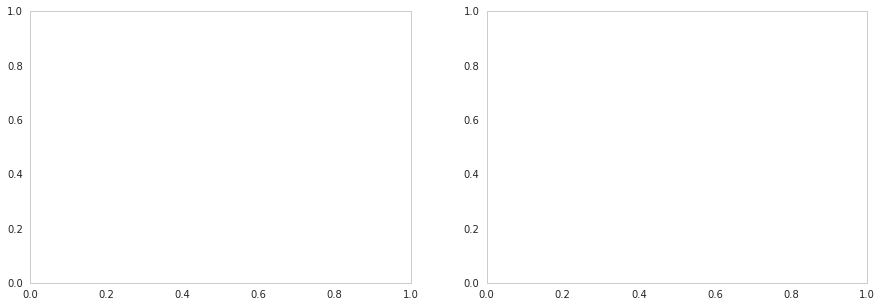

In [17]:
fig, m_axs = plt.subplots(1, 2, figsize=(15, 5))
for c_ax, (c_name, n_rows) in zip(m_axs, body_pose_df.groupby('video')):
    for i in range(17):
        c_rows = n_rows.query('bp_{}_score>0.6'.format(i)) # only keep confident results
        c_ax.plot(c_rows['bp_{}_x'.format(i)], c_rows['bp_{}_y'.format(i)], label='BP {}'.format(i))
    c_ax.legend()
    c_ax.set_title(c_name)

In [16]:
body_pose_df.to_csv('test_pose_1.csv', index=False)

In [114]:
df3=pd.read_csv('body_pose_spit_front_1.csv')
df3.head()

,bp_0_x,bp_0_y,bp_10_x,bp_10_y,bp_11_x,bp_11_y,bp_12_x,bp_12_y,bp_13_x,bp_13_y,bp_14_x,bp_14_y,bp_15_x,bp_15_y,bp_16_x,bp_16_y,bp_17_x,bp_17_y,bp_1_x,bp_1_y,bp_2_x,bp_2_y,bp_3_x,bp_3_y,bp_4_x,bp_4_y,bp_5_x,bp_5_y,bp_6_x,bp_6_y,bp_7_x,bp_7_y,bp_8_x,bp_8_y,bp_9_x,bp_9_y,time,video
0,0.537037,0.635870,0.490741,0.467391,0.541667,0.548913,0.541667,0.510870,0.527778,0.467391,0.532407,0.641304,0.541667,0.641304,0.523148,0.641304,0.550926,0.63587,0.532407,0.614130,0.50463,0.619565,0.476852,0.586957,0.476852,0.554348,0.560185,0.614130,0.578704,0.592391,0.578704,0.554348,0.50463,0.548913,0.495370,0.510870,66.870007,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...
1,0.537037,0.641304,0.490741,0.461957,0.541667,0.548913,0.541667,0.510870,0.527778,0.467391,0.532407,0.646739,0.541667,0.646739,0.523148,0.641304,0.550926,0.63587,0.532407,0.614130,0.50463,0.619565,0.476852,0.586957,0.476852,0.554348,0.560185,0.614130,0.578704,0.592391,0.578704,0.554348,0.50463,0.548913,0.495370,0.510870,100.305011,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...
2,0.537037,0.635870,0.490741,0.461957,0.541667,0.543478,0.537037,0.510870,0.527778,0.467391,0.532407,0.646739,0.541667,0.641304,0.523148,0.641304,0.546296,0.63587,0.527778,0.614130,0.50000,0.614130,0.476852,0.586957,0.476852,0.548913,0.555556,0.608696,0.578704,0.592391,0.578704,0.554348,0.50463,0.548913,0.495370,0.510870,133.740015,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...
3,0.532407,0.635870,0.490741,0.461957,0.537037,0.543478,0.537037,0.505435,0.527778,0.467391,0.527778,0.641304,0.541667,0.641304,0.518519,0.635870,0.546296,0.63587,0.532407,0.608696,0.50463,0.614130,0.476852,0.586957,0.476852,0.548913,0.560185,0.608696,0.578704,0.592391,0.578704,0.548913,0.50463,0.548913,0.495370,0.510870,167.175018,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...
4,0.532407,0.635870,0.486111,0.456522,0.537037,0.543478,0.532407,0.505435,0.527778,0.461957,0.527778,0.646739,0.537037,0.641304,0.518519,0.635870,0.546296,0.63587,0.527778,0.608696,0.50000,0.614130,0.476852,0.586957,0.472222,0.548913,0.555556,0.608696,0.578704,0.586957,0.574074,0.548913,0.50000,0.543478,0.490741,0.505435,200.610022,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...


In [115]:
df=pd.read_csv('body_pose_normal_front_1.csv')
df.head()

,bp_0_x,bp_0_y,bp_10_x,bp_10_y,bp_11_x,bp_11_y,bp_12_x,bp_12_y,bp_13_x,bp_13_y,bp_14_x,bp_14_y,bp_15_x,bp_15_y,bp_16_x,bp_16_y,bp_17_x,bp_17_y,bp_1_x,bp_1_y,bp_2_x,bp_2_y,bp_3_x,bp_3_y,bp_4_x,bp_4_y,bp_5_x,bp_5_y,bp_6_x,bp_6_y,bp_7_x,bp_7_y,bp_8_x,bp_8_y,bp_9_x,bp_9_y,time,video
0,0.458333,0.668478,0.425926,0.451087,0.472222,0.538043,0.476852,0.489130,0.472222,0.429348,0.453704,0.673913,0.467593,0.673913,0.439815,0.668478,0.476852,0.663043,0.453704,0.630435,0.407407,0.630435,0.37037,0.592391,0.37037,0.554348,0.49537,0.625,0.513889,0.592391,0.513889,0.548913,0.421296,0.538043,0.416667,0.500000,67.261538,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...
1,0.462963,0.668478,0.425926,0.451087,0.472222,0.538043,0.481481,0.494565,0.472222,0.429348,0.458333,0.673913,0.472222,0.673913,0.444444,0.668478,0.481481,0.663043,0.453704,0.630435,0.412037,0.630435,0.37500,0.597826,0.37037,0.554348,0.49537,0.625,0.513889,0.592391,0.518519,0.548913,0.421296,0.538043,0.416667,0.505435,100.892308,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...
2,0.462963,0.668478,0.425926,0.451087,0.476852,0.538043,0.481481,0.489130,0.472222,0.429348,0.458333,0.679348,0.472222,0.673913,0.444444,0.668478,0.481481,0.663043,0.458333,0.630435,0.412037,0.630435,0.37500,0.597826,0.37500,0.554348,0.50000,0.625,0.518519,0.592391,0.518519,0.548913,0.425926,0.538043,0.421296,0.500000,134.523077,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...
3,0.462963,0.668478,0.425926,0.451087,0.476852,0.532609,0.481481,0.489130,0.472222,0.429348,0.458333,0.673913,0.472222,0.673913,0.444444,0.668478,0.481481,0.663043,0.458333,0.630435,0.412037,0.630435,0.37963,0.597826,0.37500,0.554348,0.50000,0.625,0.518519,0.586957,0.523148,0.543478,0.425926,0.538043,0.421296,0.505435,168.153846,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...
4,0.467593,0.668478,0.425926,0.451087,0.476852,0.532609,0.481481,0.483696,0.472222,0.429348,0.458333,0.673913,0.472222,0.673913,0.444444,0.668478,0.486111,0.663043,0.458333,0.630435,0.412037,0.635870,0.37963,0.597826,0.37500,0.554348,0.50000,0.625,0.518519,0.586957,0.523148,0.543478,0.425926,0.538043,0.425926,0.500000,201.784615,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...


In [127]:
df2=pd.read_csv('./body_pose_spit_front_2.csv')
df2.head()

,bp_0_x,bp_0_y,bp_10_x,bp_10_y,bp_11_x,bp_11_y,bp_12_x,bp_12_y,bp_13_x,bp_13_y,bp_14_x,bp_14_y,bp_15_x,bp_15_y,bp_16_x,bp_16_y,bp_17_x,bp_17_y,bp_1_x,bp_1_y,bp_2_x,bp_2_y,bp_3_x,bp_3_y,bp_4_x,bp_4_y,bp_5_x,bp_5_y,bp_6_x,bp_6_y,bp_7_x,bp_7_y,bp_8_x,bp_8_y,bp_9_x,bp_9_y,time,video
0,0.472222,0.690217,0.435185,0.461957,0.490741,0.565217,0.495370,0.521739,0.486111,0.478261,0.467593,0.695652,0.481481,0.695652,0.453704,0.690217,0.490741,0.684783,0.472222,0.652174,0.430556,0.657609,0.402778,0.619565,0.398148,0.576087,0.513889,0.652174,0.541667,0.61413,0.541667,0.570652,0.439815,0.570652,0.435185,0.521739,66.981414,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...
1,0.467593,0.690217,0.435185,0.461957,0.486111,0.565217,0.490741,0.516304,0.486111,0.472826,0.462963,0.695652,0.476852,0.695652,0.449074,0.690217,0.486111,0.684783,0.467593,0.652174,0.425926,0.652174,0.398148,0.614130,0.393519,0.570652,0.509259,0.652174,0.537037,0.61413,0.537037,0.570652,0.435185,0.565217,0.430556,0.516304,100.472121,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...
2,0.462963,0.690217,0.435185,0.461957,0.486111,0.565217,0.486111,0.521739,0.481481,0.478261,0.458333,0.695652,0.472222,0.695652,0.444444,0.690217,0.486111,0.684783,0.462963,0.652174,0.421296,0.652174,0.398148,0.614130,0.393519,0.570652,0.504630,0.652174,0.532407,0.61413,0.532407,0.570652,0.435185,0.565217,0.430556,0.516304,133.962828,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...
3,0.462963,0.690217,0.435185,0.461957,0.486111,0.559783,0.486111,0.527174,0.486111,0.478261,0.458333,0.695652,0.472222,0.695652,0.444444,0.690217,0.481481,0.684783,0.462963,0.652174,0.421296,0.652174,0.398148,0.614130,0.393519,0.570652,0.504630,0.652174,0.532407,0.61413,0.532407,0.570652,0.435185,0.559783,0.435185,0.510870,167.453535,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...
4,0.462963,0.690217,0.439815,0.461957,0.486111,0.554348,0.490741,0.527174,0.481481,0.478261,0.453704,0.695652,0.467593,0.695652,0.444444,0.690217,0.481481,0.684783,0.462963,0.652174,0.416667,0.652174,0.393519,0.614130,0.388889,0.565217,0.504630,0.652174,0.527778,0.61413,0.532407,0.570652,0.435185,0.554348,0.435185,0.483696,200.944242,WhatsApp Video 2020-11-25 at 18.47.27.mp4_out_...


In [128]:
df1=pd.read_csv('./body_pose_spit_front_1.csv')
df1.head()

,bp_0_x,bp_0_y,bp_10_x,bp_10_y,bp_11_x,bp_11_y,bp_12_x,bp_12_y,bp_13_x,bp_13_y,bp_14_x,bp_14_y,bp_15_x,bp_15_y,bp_16_x,bp_16_y,bp_17_x,bp_17_y,bp_1_x,bp_1_y,bp_2_x,bp_2_y,bp_3_x,bp_3_y,bp_4_x,bp_4_y,bp_5_x,bp_5_y,bp_6_x,bp_6_y,bp_7_x,bp_7_y,bp_8_x,bp_8_y,bp_9_x,bp_9_y,time,video
0,0.537037,0.635870,0.490741,0.467391,0.541667,0.548913,0.541667,0.510870,0.527778,0.467391,0.532407,0.641304,0.541667,0.641304,0.523148,0.641304,0.550926,0.63587,0.532407,0.614130,0.50463,0.619565,0.476852,0.586957,0.476852,0.554348,0.560185,0.614130,0.578704,0.592391,0.578704,0.554348,0.50463,0.548913,0.495370,0.510870,66.870007,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...
1,0.537037,0.641304,0.490741,0.461957,0.541667,0.548913,0.541667,0.510870,0.527778,0.467391,0.532407,0.646739,0.541667,0.646739,0.523148,0.641304,0.550926,0.63587,0.532407,0.614130,0.50463,0.619565,0.476852,0.586957,0.476852,0.554348,0.560185,0.614130,0.578704,0.592391,0.578704,0.554348,0.50463,0.548913,0.495370,0.510870,100.305011,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...
2,0.537037,0.635870,0.490741,0.461957,0.541667,0.543478,0.537037,0.510870,0.527778,0.467391,0.532407,0.646739,0.541667,0.641304,0.523148,0.641304,0.546296,0.63587,0.527778,0.614130,0.50000,0.614130,0.476852,0.586957,0.476852,0.548913,0.555556,0.608696,0.578704,0.592391,0.578704,0.554348,0.50463,0.548913,0.495370,0.510870,133.740015,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...
3,0.532407,0.635870,0.490741,0.461957,0.537037,0.543478,0.537037,0.505435,0.527778,0.467391,0.527778,0.641304,0.541667,0.641304,0.518519,0.635870,0.546296,0.63587,0.532407,0.608696,0.50463,0.614130,0.476852,0.586957,0.476852,0.548913,0.560185,0.608696,0.578704,0.592391,0.578704,0.548913,0.50463,0.548913,0.495370,0.510870,167.175018,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...
4,0.532407,0.635870,0.486111,0.456522,0.537037,0.543478,0.532407,0.505435,0.527778,0.461957,0.527778,0.646739,0.537037,0.641304,0.518519,0.635870,0.546296,0.63587,0.527778,0.608696,0.50000,0.614130,0.476852,0.586957,0.472222,0.548913,0.555556,0.608696,0.578704,0.586957,0.574074,0.548913,0.50000,0.543478,0.490741,0.505435,200.610022,WhatsApp Video 2020-11-25 at 18.47.26 (3).mp4_...


In [129]:
#df1 = df[['bp_0_x': 'bp_9_y']]
new1 = df1.iloc[: , 0:36]

In [130]:
new2=df2.iloc[:,0:36]

In [116]:
new=df.iloc[:,0:36]

In [117]:
new3=df3.iloc[:,0:36]

In [51]:
# new2.tail()

In [118]:
new3.tail()

,bp_0_x,bp_0_y,bp_10_x,bp_10_y,bp_11_x,bp_11_y,bp_12_x,bp_12_y,bp_13_x,bp_13_y,bp_14_x,bp_14_y,bp_15_x,bp_15_y,bp_16_x,bp_16_y,bp_17_x,bp_17_y,bp_1_x,bp_1_y,bp_2_x,bp_2_y,bp_3_x,bp_3_y,bp_4_x,bp_4_y,bp_5_x,bp_5_y,bp_6_x,bp_6_y,bp_7_x,bp_7_y,bp_8_x,bp_8_y,bp_9_x,bp_9_y
147,0.444444,0.586957,0.444444,0.233696,0.546296,0.418478,0.550926,0.320652,0.532407,0.255435,0.430556,0.608696,0.462963,0.608696,NaN,NaN,0.504630,0.625,0.486111,0.559783,0.412037,0.559783,0.393519,0.494565,0.384259,0.429348,0.560185,0.559783,0.638889,0.478261,0.611111,0.391304,0.458333,0.418478,0.444444,0.326087
148,0.444444,0.592391,0.435185,0.211957,0.546296,0.418478,0.550926,0.320652,0.532407,0.250000,0.430556,0.608696,0.462963,0.614130,NaN,NaN,0.509259,0.625,0.490741,0.559783,0.412037,0.559783,0.393519,0.494565,0.379630,0.423913,0.569444,0.559783,0.638889,0.478261,0.611111,0.391304,0.458333,0.418478,0.444444,0.315217
149,0.444444,0.592391,0.435185,0.190217,0.546296,0.407609,0.550926,0.320652,0.537037,0.255435,0.430556,0.614130,0.462963,0.614130,0.412037,0.625,0.509259,0.625,0.490741,0.559783,0.407407,0.559783,0.388889,0.494565,0.379630,0.418478,0.569444,0.559783,0.638889,0.478261,0.615741,0.391304,0.453704,0.407609,0.444444,0.298913
150,0.449074,0.592391,0.430556,0.173913,0.546296,0.407609,0.550926,0.315217,0.532407,0.250000,0.430556,0.614130,0.467593,0.614130,NaN,NaN,0.509259,0.625,0.490741,0.559783,0.407407,0.559783,0.384259,0.483696,0.370370,0.413043,0.574074,0.554348,0.638889,0.478261,0.615741,0.385870,0.453704,0.413043,0.439815,0.293478
151,0.449074,0.592391,0.430556,0.168478,0.546296,0.413043,0.546296,0.309783,0.532407,0.250000,0.430556,0.614130,0.467593,0.614130,0.407407,0.625,0.504630,0.625,0.486111,0.559783,0.398148,0.559783,0.375000,0.483696,0.365741,0.413043,0.569444,0.554348,0.634259,0.472826,0.615741,0.385870,0.449074,0.407609,0.435185,0.288043


In [119]:
new.tail()

,bp_0_x,bp_0_y,bp_10_x,bp_10_y,bp_11_x,bp_11_y,bp_12_x,bp_12_y,bp_13_x,bp_13_y,bp_14_x,bp_14_y,bp_15_x,bp_15_y,bp_16_x,bp_16_y,bp_17_x,bp_17_y,bp_1_x,bp_1_y,bp_2_x,bp_2_y,bp_3_x,bp_3_y,bp_4_x,bp_4_y,bp_5_x,bp_5_y,bp_6_x,bp_6_y,bp_7_x,bp_7_y,bp_8_x,bp_8_y,bp_9_x,bp_9_y
124,0.472222,0.711957,0.365741,0.135870,0.513889,0.418478,0.490741,0.293478,0.467593,0.228261,0.453704,0.728261,0.495370,0.728261,0.416667,0.706522,0.527778,0.706522,0.462963,0.619565,0.347222,0.625000,0.291667,0.521739,0.277778,0.418478,0.574074,0.61413,0.620370,0.510870,0.62963,0.402174,0.379630,0.423913,0.370370,0.277174
125,0.467593,0.711957,0.365741,0.141304,0.504630,0.418478,0.481481,0.282609,0.462963,0.228261,0.444444,0.728261,0.486111,0.728261,0.407407,0.706522,0.518519,0.701087,0.453704,0.619565,0.333333,0.619565,0.282407,0.521739,0.268519,0.413043,0.569444,0.61413,0.611111,0.505435,0.62500,0.396739,0.365741,0.418478,0.365741,0.260870
126,0.458333,0.711957,0.361111,0.130435,0.500000,0.407609,0.467593,0.255435,0.462963,0.222826,0.435185,0.733696,0.481481,0.728261,0.398148,0.711957,0.513889,0.706522,0.444444,0.619565,0.328704,0.625000,0.273148,0.516304,0.259259,0.407609,0.564815,0.61413,0.606481,0.505435,0.62037,0.396739,0.361111,0.407609,0.361111,0.173913
127,0.458333,0.717391,0.361111,0.130435,0.504630,0.407609,0.472222,0.260870,0.467593,0.228261,0.435185,0.733696,0.481481,0.728261,0.398148,0.717391,0.513889,0.706522,0.444444,0.619565,0.324074,0.625000,0.273148,0.516304,0.254630,0.407609,0.569444,0.61413,0.611111,0.505435,0.62037,0.391304,0.356481,0.402174,0.365741,0.157609
128,0.458333,0.717391,0.370370,0.141304,0.509259,0.413043,0.481481,0.266304,0.472222,0.228261,0.435185,0.733696,0.481481,0.733696,0.398148,0.717391,0.513889,0.706522,0.444444,0.619565,0.324074,0.625000,0.268519,0.516304,0.254630,0.402174,0.569444,0.61413,0.611111,0.505435,0.62500,0.396739,0.365741,0.413043,0.365741,0.206522


In [131]:
new1.fillna(0,inplace=True)


In [132]:
new2.fillna(0,inplace=True)


In [120]:
new.fillna(0,inplace=True)

In [121]:
new3.fillna(0,inplace=True)

In [41]:
# new1.tail()

In [144]:

# new1=new1.iloc[0:32]

In [123]:
# new1.tail()

In [122]:
names=list(new3.columns.values)

In [71]:
print(names)

['bp_0_x', 'bp_0_y', 'bp_10_x', 'bp_10_y', 'bp_11_x', 'bp_11_y', 'bp_12_x', 'bp_12_y', 'bp_13_x', 'bp_13_y', 'bp_14_x', 'bp_14_y', 'bp_16_x', 'bp_16_y', 'bp_17_x', 'bp_17_y', 'bp_1_x', 'bp_1_y', 'bp_2_x', 'bp_2_y', 'bp_3_x', 'bp_3_y', 'bp_4_x', 'bp_4_y', 'bp_5_x', 'bp_5_y', 'bp_6_x', 'bp_6_y', 'bp_7_x', 'bp_7_y', 'bp_8_x', 'bp_8_y', 'bp_9_x', 'bp_9_y']


In [124]:
from scipy.spatial.distance import cosine
from pandas import DataFrame

In [125]:
# for name in names:
#     print(1 - cosine(new[name], new1[name]))

In [133]:
from dtaidistance import dtw
for name in names:
    if name in new.columns and name in new3.columns:
        distance = dtw.distance(new2[name], new1[name])
        print(distance)

1.3225353659689723
0.7204521330334434
1.030703626512708
0.5021515617084897
1.0272249931523896
0.09012567365096186
0.8670024476148239
0.1287252095905108
0.7405671092798077
0.1854208924916519
0.8888286052088928
0.9418181899047926
0.8352857786180671
1.028538890624662
1.0588905243986177
1.2651492212323716
1.0450562136612236
0.8465360866116258
1.2409048398944726
0.6195652173913047
1.3838101587846348
0.42083610179578157
1.2175397819838605
0.5697715772865071
1.2113096592263188
0.6686549784090662
1.0400089690443686
0.8140027182576309
0.8807132701382049
0.6597163493697189
0.799399101314507
0.5607579093443531
1.095521419722116
0.06291215708038168
0.9309124983375411
0.1800874078889227


In [126]:
!pip install dtaidistance
from dtaidistance import dtw
for name in names:
    if name in new.columns and name in new3.columns:
        distance = dtw.distance(new3[name], new[name])
        print(distance)

You are using pip version 19.0.3, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
0.6081402252833482
1.011030258382428
1.1657385344020545
0.6649118366163971
0.5320248222805338
0.048610173423908366
0.6337352525861015
0.24359711772842377
0.7369550252156994
0.19390829103164456
1.8213753772208052
3.1129920523442403
0.7596120454110821
1.216262578448975
2.5063491051253597
4.398905120264456
0.5606441340040411
0.779981247653988
0.5760494687071631
0.4986394532603953
0.7315107823479834
0.5060771980980595
0.9322009591594976
0.538455046804384
1.0997295153167035
0.6587306275690713
0.38692737237781233
0.3941247991155635
0.2694348986472492
0.09737213514765719
0.2284993088750564
0.023689668171416527
0.9346922976884032
0.04769002384452205
0.9147356203537896
0.2694468533965334
